In [98]:
# Importation des bibliothèques nécessaires
import os                        # Bibliothèque pour les opérations liées au système d'exploitation
import pandas as pd              # Bibliothèque pour la manipulation de données tabulaires
import numpy as np               # Bibliothèque pour les opérations numériques
import matplotlib.pyplot as plt  # Bibliothèque pour la création de graphiques
import seaborn as sns            # Bibliothèque pour la visualisation avancée des données

# Vision Globale de la Dataset Fraud

La dataset 2 **" Transactions "** est destinée à la détection de transactions frauduleuses par carte de crédit :

- Taille de la Dataset: **140 MO**
- Format: **CSV**
- Nombre de lignes: **786363**
- Nombre de colonnes: **30**

C'est un problème de classification binaire visant à **prédire si une transaction est frauduleuse.**

**Données déséquilibrées :** Seulement **1,58 %** transactions frauduleuses parmi 786363 transactions.

[**Télécharger la dataset**](https://www.kaggle.com/datasets/ranjeetshrivastav/fraud-detection-dataset)

In [99]:
##importer le dataset

data = pd.read_csv('transactions')

# Chargement du jeu de données depuis le fichier CSV
data = pd.read_csv('transactions')
# Taille de la Dataset :
Taille =  os.path.getsize('transactions' ) / (1024 * 1024)
print(f'La Taille de la Dataset est : {Taille} MO ')
# Nombre de Ligne et colonnes :
num_rows, num_columns = data.shape
print("Nombre de lignes :", num_rows)
print("Nombre de colonnes :", num_columns)
# Déséquilibre des données :
fraud_counts = data['isFraud'].value_counts()
print("Nombre total de transactions frauduleuses :", fraud_counts[1])

La Taille de la Dataset est : 140.63606071472168 MO 
Nombre de lignes : 786363
Nombre de colonnes : 30
Nombre total de transactions frauduleuses : 12417


In [100]:
data.columns

Index(['Unnamed: 0', 'accountNumber', 'customerId', 'creditLimit',
       'availableMoney', 'transactionDateTime', 'transactionAmount',
       'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV',
       'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch',
       'isFraud'],
      dtype='object')

In [101]:
data.head(n=5)


,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


## Exploration et Analyse des Données :

In [102]:
# Affichage d'un échantillon aléatoire du DataFrame pour avoir un aperçu
data.sample(n=5)

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
719032,719032,474934734,474934734,2500,493.79,2016-03-21T22:41:06,35.67,Dinosaur Drive in,US,US,5.0,1.0,food,05/2025,2015-12-05,2016-02-13,787,787,2934,PURCHASE,NaN,2006.21,NaN,NaN,NaN,True,NaN,NaN,False,False
672135,672135,782081187,782081187,15000,1233.55,2016-10-12T13:22:17,19.52,AMC #606218,US,US,5.0,1.0,entertainment,09/2025,2014-01-15,2016-10-02,840,840,7654,PURCHASE,NaN,13766.45,NaN,NaN,NaN,True,NaN,NaN,False,False
123832,123832,151580474,151580474,1000,447.98,2016-10-04T05:02:41,13.04,sears.com,US,US,5.0,1.0,online_retail,10/2025,2014-04-27,2016-08-15,874,874,921,REVERSAL,NaN,552.02,NaN,NaN,NaN,False,NaN,NaN,False,False
498429,498429,876037288,876037288,10000,8172.28,2016-06-30T01:25:08,43.37,Hardee's #325001,US,US,2.0,1.0,fastfood,12/2021,2012-04-19,2012-04-19,868,868,4927,PURCHASE,NaN,1827.72,NaN,NaN,NaN,True,NaN,NaN,False,False
583629,583629,882815134,882815134,50000,32163.11,2016-04-27T04:06:01,63.63,Hilton Hotels #653402,US,US,2.0,8.0,hotels,06/2022,2014-09-30,2016-04-18,640,640,6580,PURCHASE,NaN,17836.89,NaN,NaN,NaN,False,NaN,NaN,False,False


In [103]:
# Obtention d'informations sur le jeu de données : types de données, valeurs non nulles, mémoire utilisée
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionDateTime       786363 non-null  object 
 6   transactionAmount         786363 non-null  float64
 7   merchantName              786363 non-null  object 
 8   acqCountry                781801 non-null  object 
 9   merchantCountryCode       785639 non-null  object 
 10  posEntryMode              782309 non-null  float64
 11  posConditionCode          785954 non-null  float64
 12  merchantCategoryCode      786363 non-null  object 
 13  currentExpDate            786363 non-null  o

In [104]:
# Création d'une copie de la dataset pour les manipulations
df = data.copy()


In [105]:
df.describe(include='all')

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,786363.000000,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363,786363.000000,786363,781801,785639,782309.000000,785954.000000,786363,786363,786363,786363,786363.000000,786363.000000,786363.000000,785665,0.0,786363.000000,0.0,0.0,0.0,786363,0.0,0.0,786363,786363
unique,NaN,NaN,NaN,NaN,NaN,776637,NaN,2490,4,4,NaN,NaN,19,165,1820,2184,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,2016-12-25T14:04:15,NaN,Uber,US,US,NaN,NaN,online_retail,03/2029,2014-06-21,2016-03-15,NaN,NaN,NaN,PURCHASE,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False
freq,NaN,NaN,NaN,NaN,NaN,4,NaN,25613,774709,778511,NaN,NaN,202156,5103,33623,3819,NaN,NaN,NaN,745193,NaN,NaN,NaN,NaN,NaN,433495,NaN,NaN,785320,773946
mean,393181.000000,5.372326e+08,5.372326e+08,10759.464459,6250.725369,NaN,136.985791,NaN,NaN,NaN,9.049943,3.271980,NaN,NaN,NaN,NaN,544.467338,544.183857,4757.417799,NaN,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,227003.589203,2.554211e+08,2.554211e+08,11636.174890,8880.783989,NaN,147.725569,NaN,NaN,NaN,16.774130,9.809023,NaN,NaN,NaN,NaN,261.524220,261.551254,2996.583810,NaN,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000881e+08,1.000881e+08,250.000000,-1005.630000,NaN,0.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,100.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,196590.500000,3.301333e+08,3.301333e+08,5000.000000,1077.420000,NaN,33.650000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,310.000000,310.000000,2178.000000,NaN,NaN,689.910000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,393181.000000,5.074561e+08,5.074561e+08,7500.000000,3184.860000,NaN,87.900000,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN,NaN,NaN,535.000000,535.000000,4733.000000,NaN,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,589771.500000,7.676200e+08,7.676200e+08,15000.000000,7500.000000,NaN,191.480000,NaN,NaN,NaN,9.000000,1.000000,NaN,NaN,NaN,NaN,785.000000,785.000000,7338.000000,NaN,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# le nombre de chaque type de données 
df.dtypes.value_counts()

float64    11
object      9
int64       7
bool        3
dtype: int64

Text(0.5, 1.0, 'Répartition des types de données')

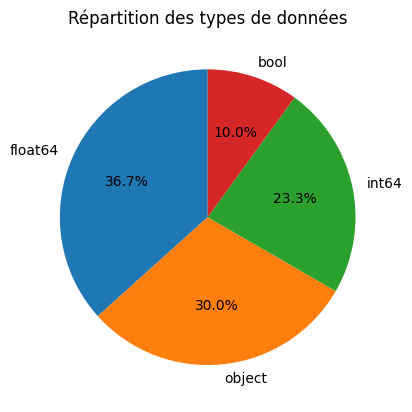

In [107]:
# Répartition des types de données
value_counts = df.dtypes.value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Répartition des types de données")

<Axes: >

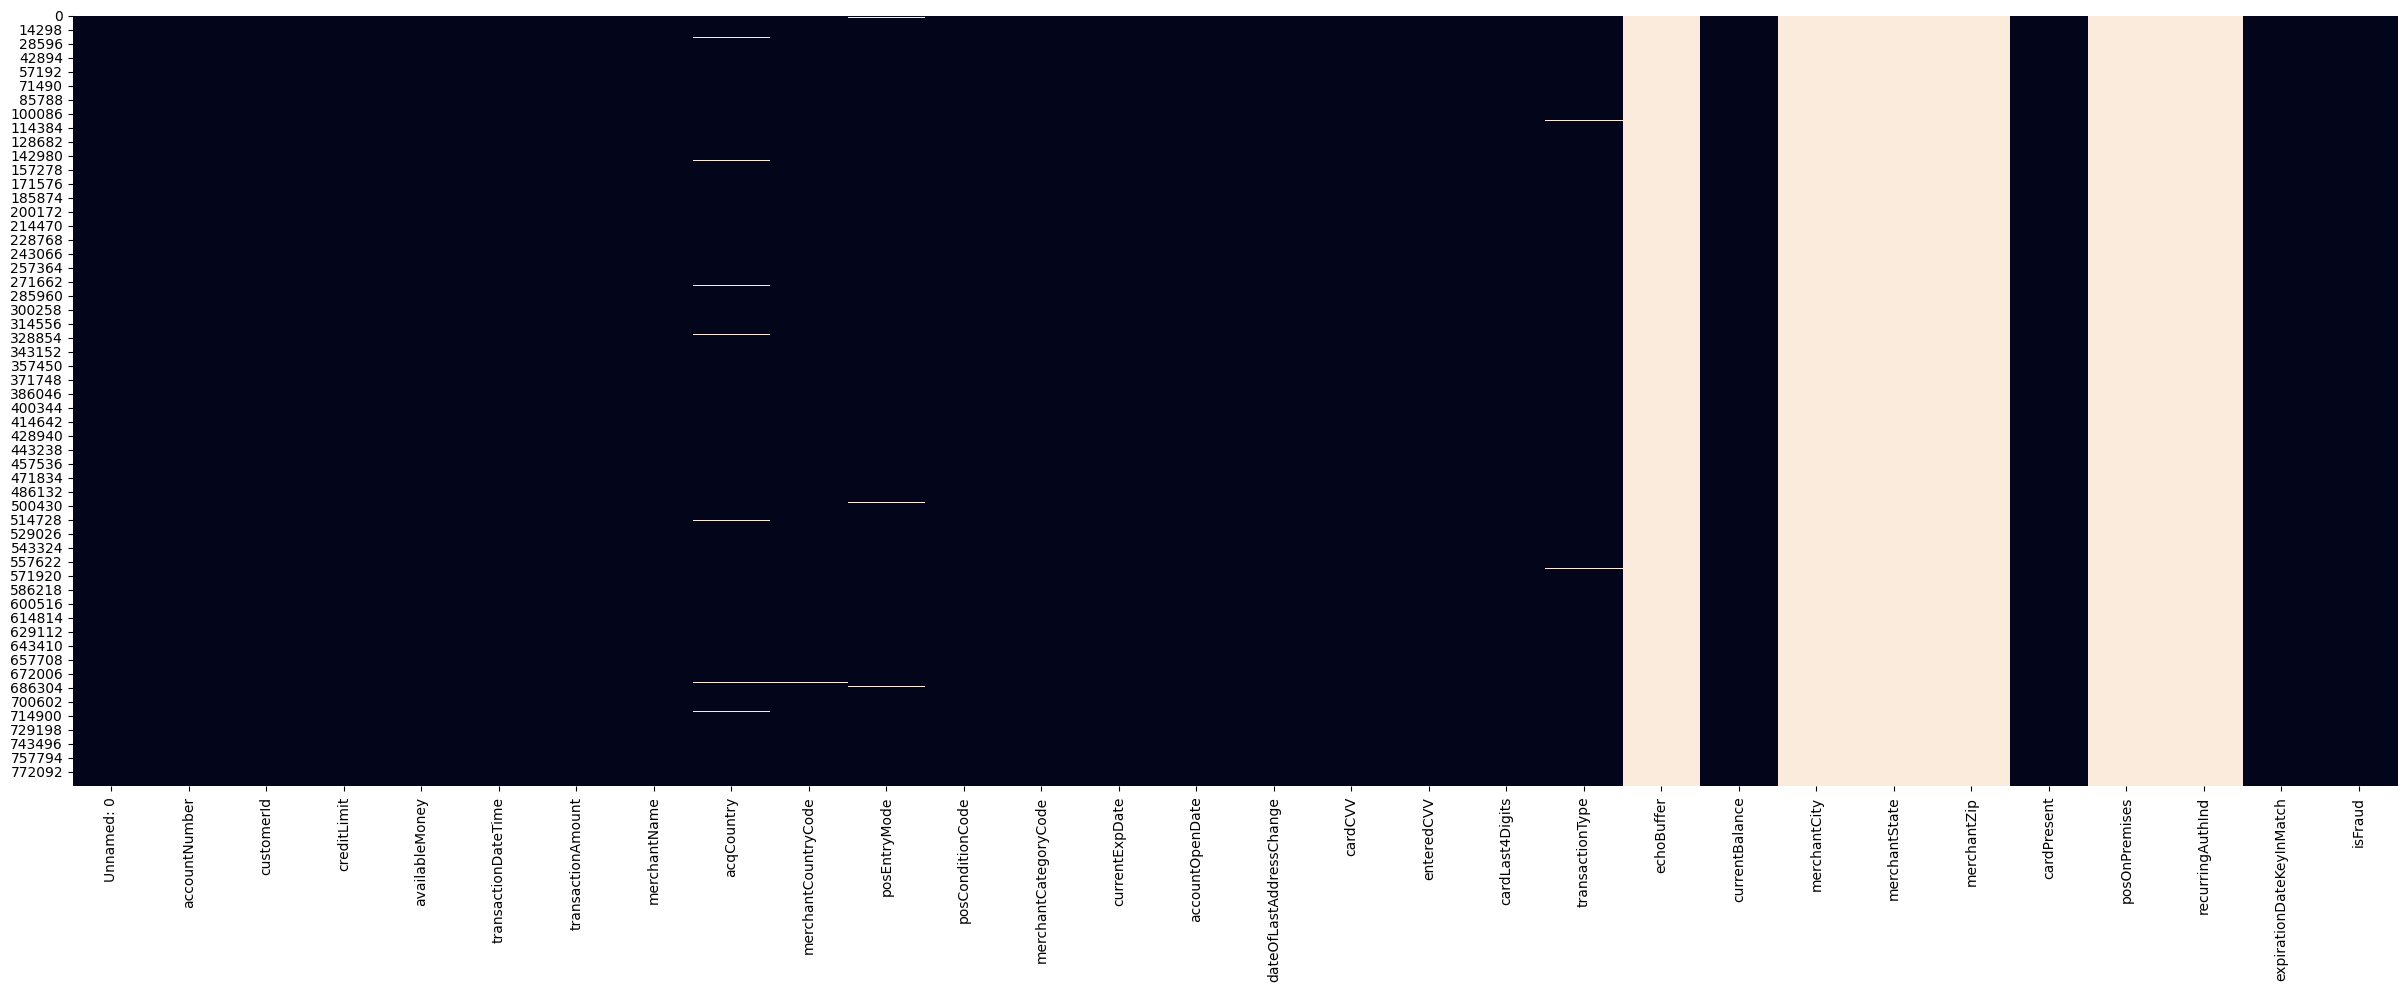

In [108]:
# Vérification des valeurs manquantes 
df.isna()
plt.figure(figsize=(30,10))
# Affichage d'une carte thermique pour visualiser les valeurs manquantes
sns.heatmap(df.isna(), cbar=False)

In [109]:
# Calculer le nombre total de valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Calculer le pourcentage de valeurs manquantes par colonne
percentage_missing = (missing_values / len(df)) * 100

# Créer un DataFrame de synthèse pour les valeurs manquantes
missing_data = pd.concat([missing_values, percentage_missing], axis=1)
missing_data.columns = ['Valeurs_manquantes', 'Pourcentage_manquant_%']
missing_data = missing_data[missing_data['Valeurs_manquantes'] > 0]  # Filtrer les colonnes avec des valeurs manquantes

# Afficher les colonnes avec les valeurs manquantes et leur pourcentage
print("Colonnes avec des valeurs manquantes :")
print(missing_data)

Colonnes avec des valeurs manquantes :
                     Valeurs_manquantes  Pourcentage_manquant_%
acqCountry                         4562                0.580139
merchantCountryCode                 724                0.092069
posEntryMode                       4054                0.515538
posConditionCode                    409                0.052012
transactionType                     698                0.088763
echoBuffer                       786363              100.000000
merchantCity                     786363              100.000000
merchantState                    786363              100.000000
merchantZip                      786363              100.000000
posOnPremises                    786363              100.000000
recurringAuthInd                 786363              100.000000


# Elimination des colonnes inutiles de premiére vue 

In [110]:
# Suppression des colonnes avec 100% de valeurs manquantes (NaN)
df = df[df.columns[(df.isna().sum() / df.shape[0])<1]]
pd.set_option('display.max_columns' ,30)
df.head()
# 'Unnamed: 0' est une répétition de l'index et n'apporte aucune information utile
df = df.drop('Unnamed: 0', axis=1)

In [111]:
for col in df.select_dtypes('int') :
    print(col)

accountNumber
customerId
creditLimit
cardCVV
enteredCVV
cardLast4Digits


C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_15256\786750848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_15256\786750848.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\MICROMEDIA\AppData\Local\Temp\ipyke

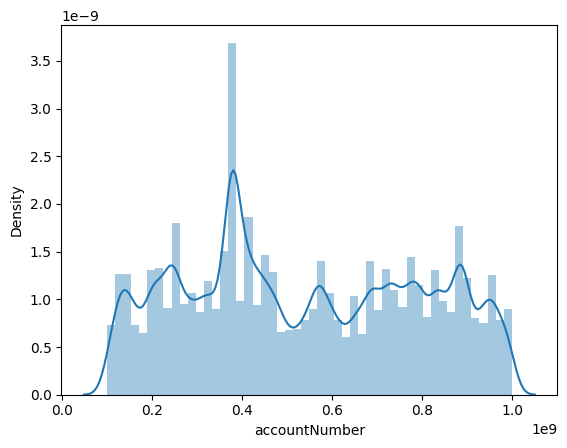

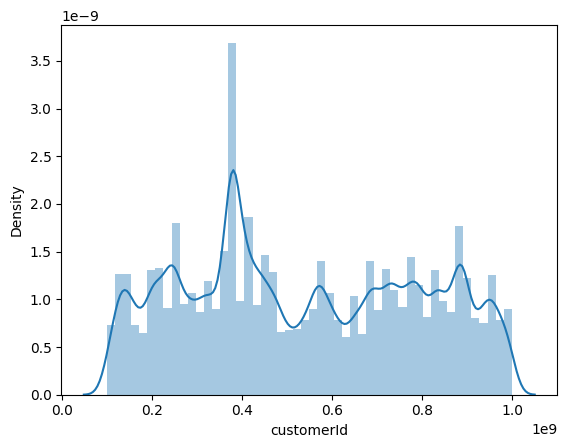

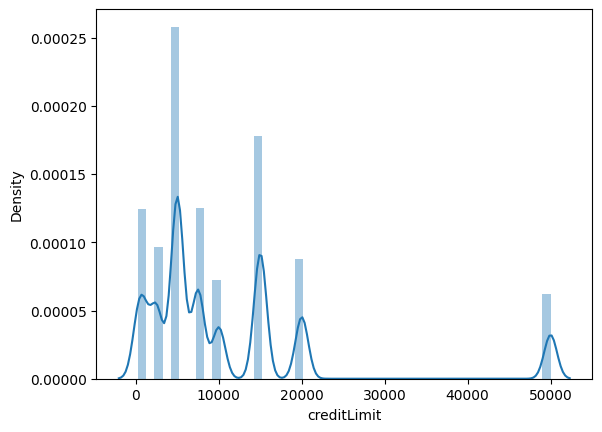

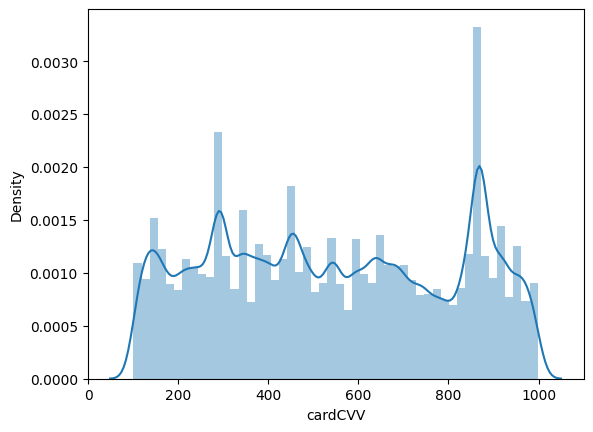

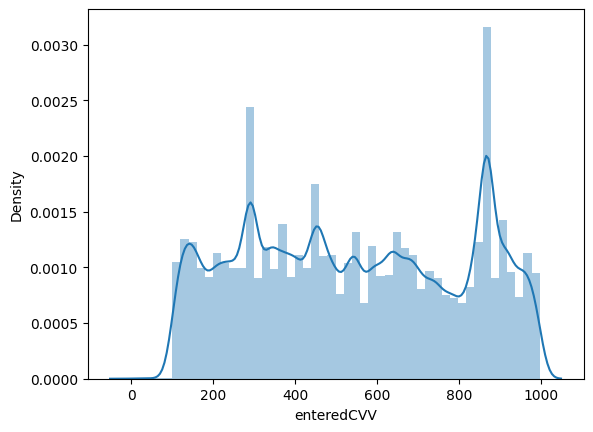

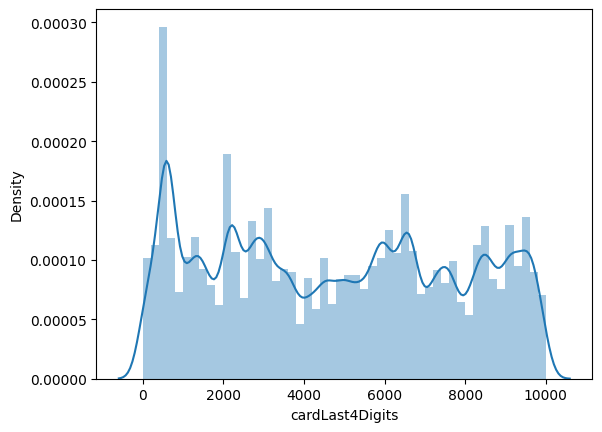

In [112]:
for col in df.select_dtypes('int') :
    plt.figure()
    sns.distplot(df[col])

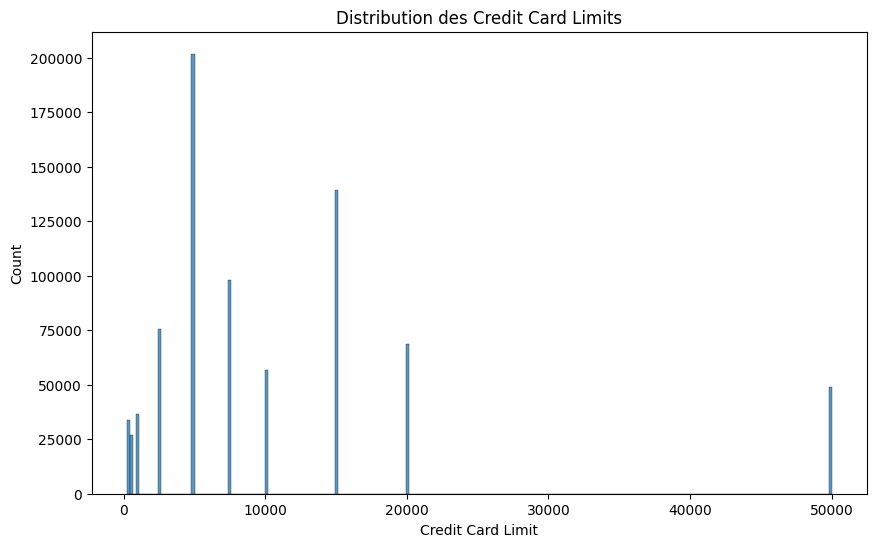

In [113]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='creditLimit')
plt.xlabel('Credit Card Limit')
plt.title('Distribution des Credit Card Limits')
plt.show()

'CreditLimit' La plupart des cartes de crédit présentent une limite de 5000 en tant que limite la plus courante. En deuxième position, nous observons une fréquence de cartes avec une limite de 15000. Par ailleurs, il existe également des cartes de crédit avec une limite maximale de 50000.

In [114]:
for col in df.select_dtypes('float') :
    print(col)

availableMoney
transactionAmount
posEntryMode
posConditionCode
currentBalance


C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_15256\2117259866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_15256\2117259866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\MICROMEDIA\AppData\Local\Temp\ipykernel_15256\2117259866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\MICROMEDIA\AppData\Local\Temp\ipy

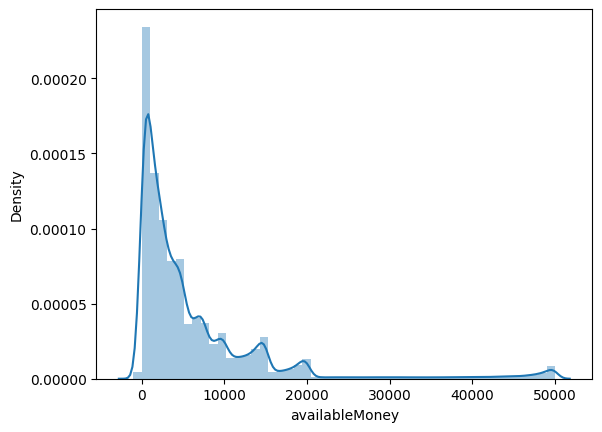

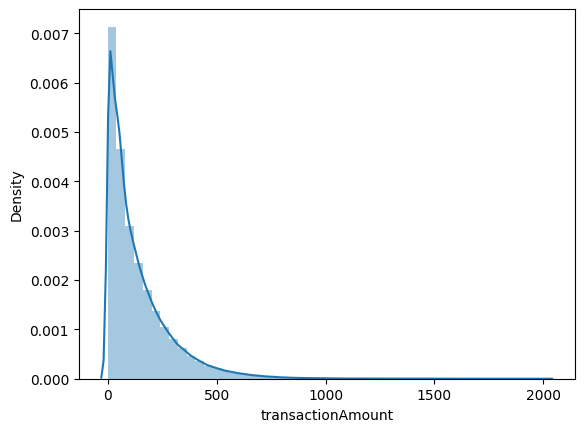

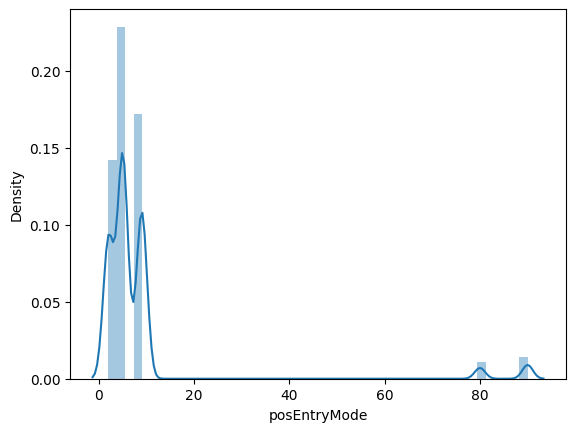

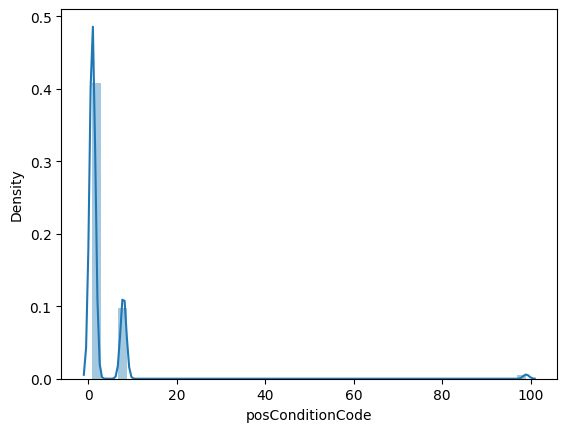

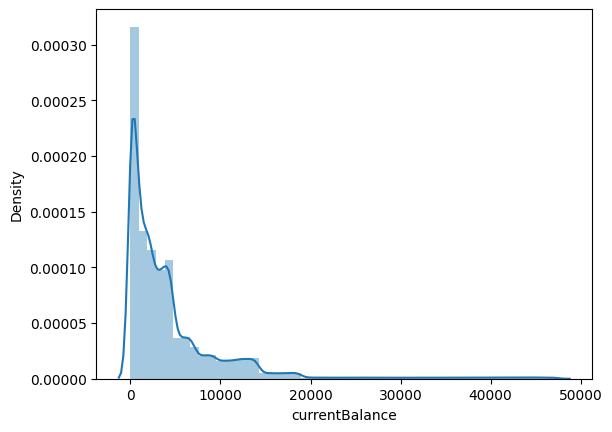

In [115]:
for col in df.select_dtypes('float') :
    plt.figure()
    sns.distplot(df[col])

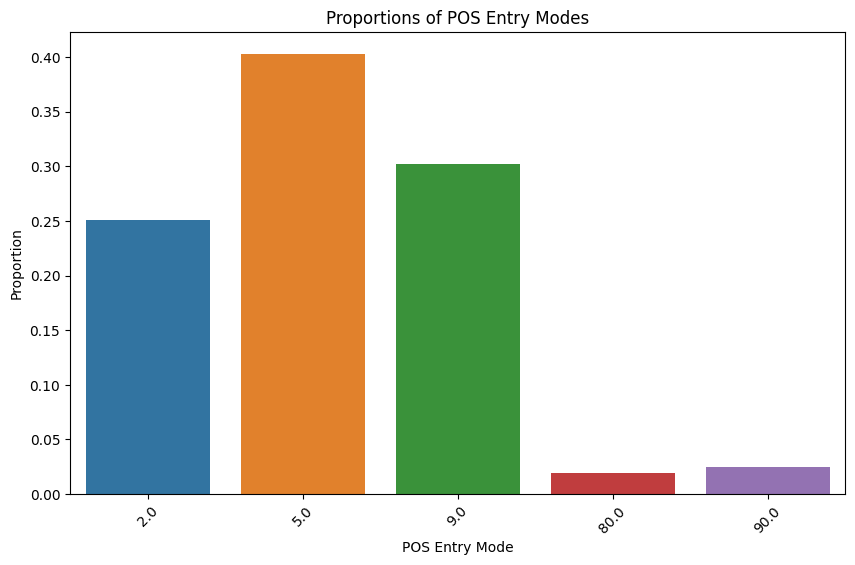

In [116]:
#posEntryMode
proportions = df['posEntryMode'].value_counts(normalize=True)

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=proportions.index, y=proportions.values)
plt.title('Proportions of POS Entry Modes')
plt.xlabel('POS Entry Mode')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

Il est remarquable qu'il existe cinq modes d'entrée POS différents. Parmi ceux-ci, les modes '05', '09' et '02' sont les plus utilisés dans les transactions

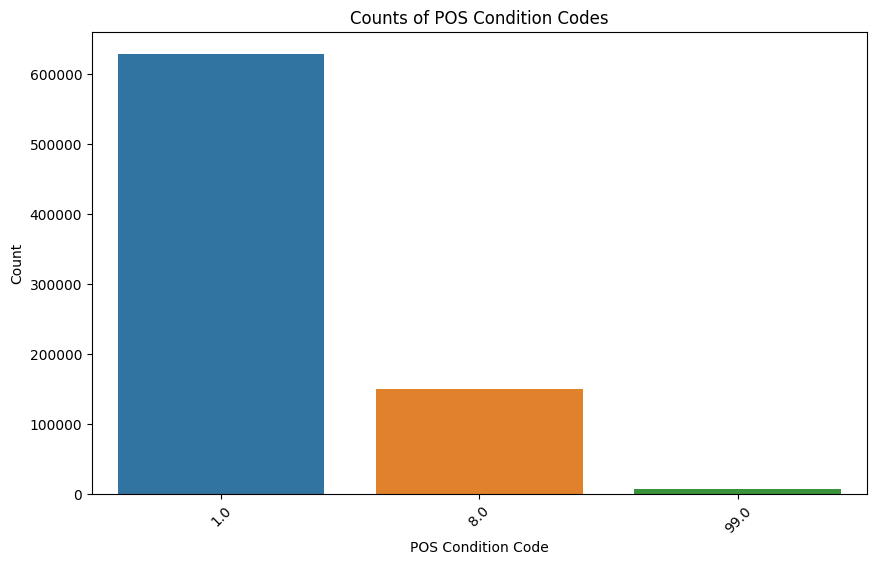

In [117]:
# posConditionCode
# Comptages des différentes catégories de posConditionCode
counts_pos_condition = df['posConditionCode'].value_counts()

# Tracer un graphique à barres
plt.figure(figsize=(10, 6))
sns.barplot(x=counts_pos_condition.index, y=counts_pos_condition.values)
plt.title('Counts of POS Condition Codes')
plt.xlabel('POS Condition Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

On remarque qu'il existe 3  POS condition mode différents , le mode "01" est le plus dominant.

#### Examiner les variables qualitatives

In [118]:
# Retourner les catégories présentes dans chaque variable
for col in df.select_dtypes('object') :
    print(f'{col:-<50}{df[col].unique()}\n')

transactionDateTime-------------------------------['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']

merchantName--------------------------------------['Uber' 'AMC #191138' 'Play Store' ... 'ATT #141119' 'EZ Wireless #200746'
 'Runners #747070']

acqCountry----------------------------------------['US' nan 'CAN' 'MEX' 'PR']



merchantCountryCode-------------------------------['US' 'CAN' nan 'PR' 'MEX']

merchantCategoryCode------------------------------['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']

currentExpDate------------------------------------['06/2023' '02/2024' '08/2025' '10/2029' '01/2020' '05/2020' '01/2021'
 '08/2032' '04/2020' '05/2023' '08/2024' '12/2031' '09/2027' '08/2022'
 '11/2027' '08/2028' '09/2032' '10/2028' '12/2021' '06/2033' '12/2019'
 '03/2024' '10/2024' '03/2021' '11/2026' '10/2032' '09/2030' '04/2023'
 '10/2031' '09/2021' '06/2032' '10/2021' '09/2031' '05/2029' '07/2020'
 '05/2024' '04/2030' '03/2022' '12/2030' '04/2026' '06/2021' '12/2028'
 '11/2030' '04/2029' '03/2032' '09/2024' '06/2031' '04/2027' '07/2027'
 '01/2033' '02/2025' '12/2029' '01/2022' '03/2029' '10/2022' '01/2030'
 '07/2029' '

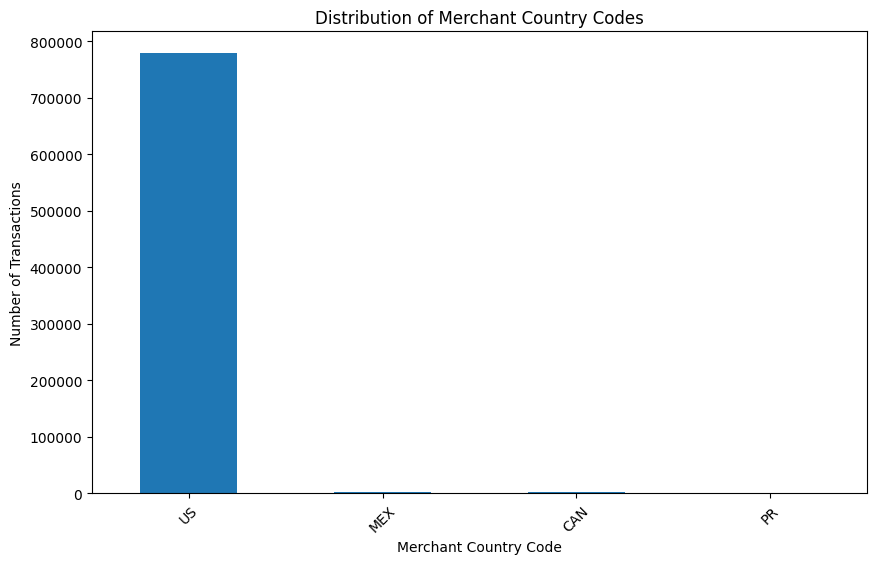

In [119]:
# merchantCountryCode
merchant_country_counts = df['merchantCountryCode'].value_counts()

plt.figure(figsize=(10, 6))
merchant_country_counts.plot(kind='bar')
plt.xlabel('Merchant Country Code')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Merchant Country Codes')
plt.xticks(rotation=45)
plt.show()

In [120]:
print(df['merchantCountryCode'].value_counts()) #(normalize=True)


US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64


In [121]:
result = df.groupby(['merchantCountryCode', 'isFraud']).size()
print(result)

merchantCountryCode  isFraud
CAN                  False        2370
                     True           56
MEX                  False        3079
                     True           64
PR                   False        1532
                     True           27
US                   False      766323
                     True        12188
dtype: int64


In [122]:
print('La proportion de transactions frauduleuses = True parmi toutes les transactions de chaque pays:')
print('(CAN) :',56/2426*100,'%')
print('(MEX):',64/3143*100,'%')
print('((PR):',27/1559*100,'%')
print('(US):',12188/778511*100,'%')

La proportion de transactions frauduleuses = True parmi toutes les transactions de chaque pays:
(CAN) : 2.3083264633140974 %
(MEX): 2.036271078587337 %
((PR): 1.731879409878127 %
(US): 1.565552702530857 %


In [123]:
# transactionType
df['transactionType'].value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

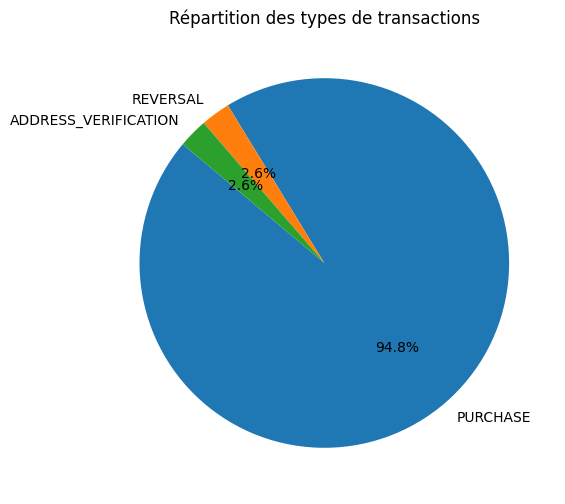

In [124]:
#types de transactions : 
trans = df['transactionType'].value_counts()

# Créer un graphique en camembert 
plt.figure(figsize=(6, 6))
plt.pie(trans, labels=trans.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des types de transactions')
plt.show()

Nous observons la présence de trois types de transactions distincts :

Le type 'PURCHASE' qui prédomine et correspond à des achats.

Le type 'REVERSAL' qui indique qu'une transaction précédente (généralement un achat) a été annulée.

Le type 'ADDRESS_VERIFICATION' qui est lié à la vérification d'adresse pour des cartes de crédit ou de débit.

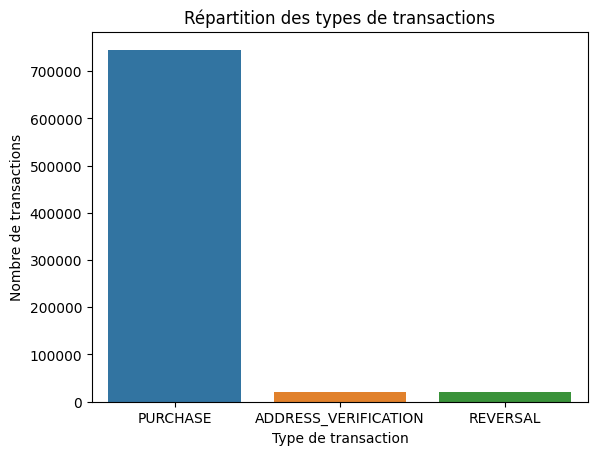

In [125]:
# repartition de types 
sns.countplot(data=df, x='transactionType')
plt.title('Répartition des types de transactions')
plt.xlabel('Type de transaction')
plt.ylabel('Nombre de transactions')
plt.show()

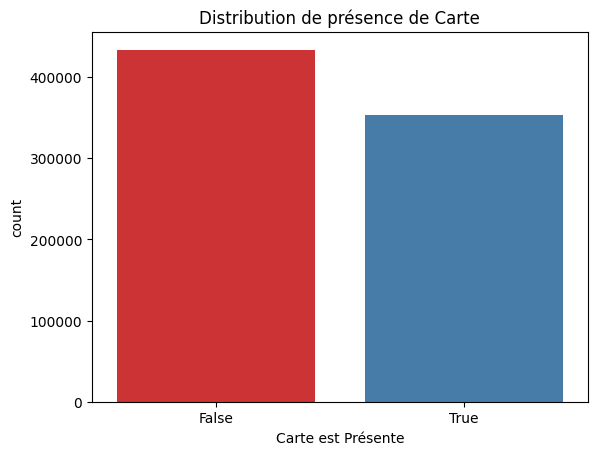

In [126]:
# CardPresent
# histogramme pour la distribution de cardPresent 
sns.countplot(data=df, x='cardPresent', palette='Set1')
plt.xlabel('Carte est Présente')
plt.title('Distribution de présence de Carte')
plt.show()

#### Target : isFraud

In [127]:
#la variable target 
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='isFraud', ylabel='Count'>

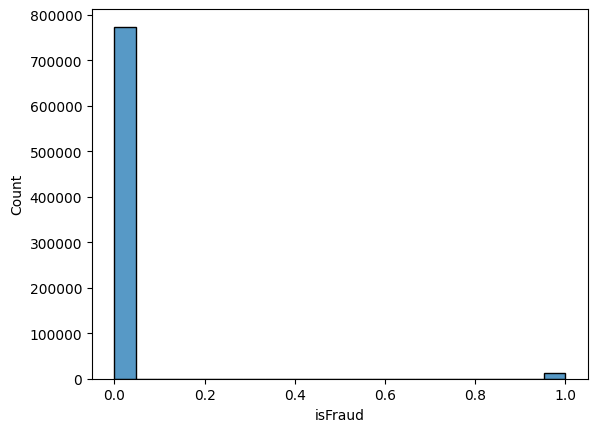

In [128]:
# visualiser la répartition (true|false)
sns.histplot(df['isFraud'])


Text(0.5, 1.0, 'Répartition des fraudes')

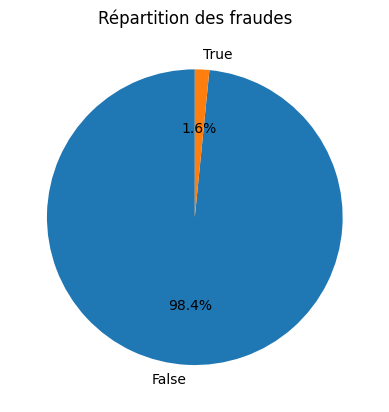

In [129]:
val = df['isFraud'].value_counts()
#graphique en camembert 
plt.pie(val, labels=val.index, autopct='%1.1f%%', startangle=90)

plt.title("Répartition des fraudes")

Distrudistribution non équilibré

In [130]:
# isFraud vs transactionType 
df.groupby(['transactionType', 'isFraud']).size()


transactionType       isFraud
ADDRESS_VERIFICATION  False       20053
                      True          116
PURCHASE              False      733243
                      True        11950
REVERSAL              False       19966
                      True          337
dtype: int64

# Prétraitement des Données :

In [131]:
df.shape

(786363, 23)

<Axes: >

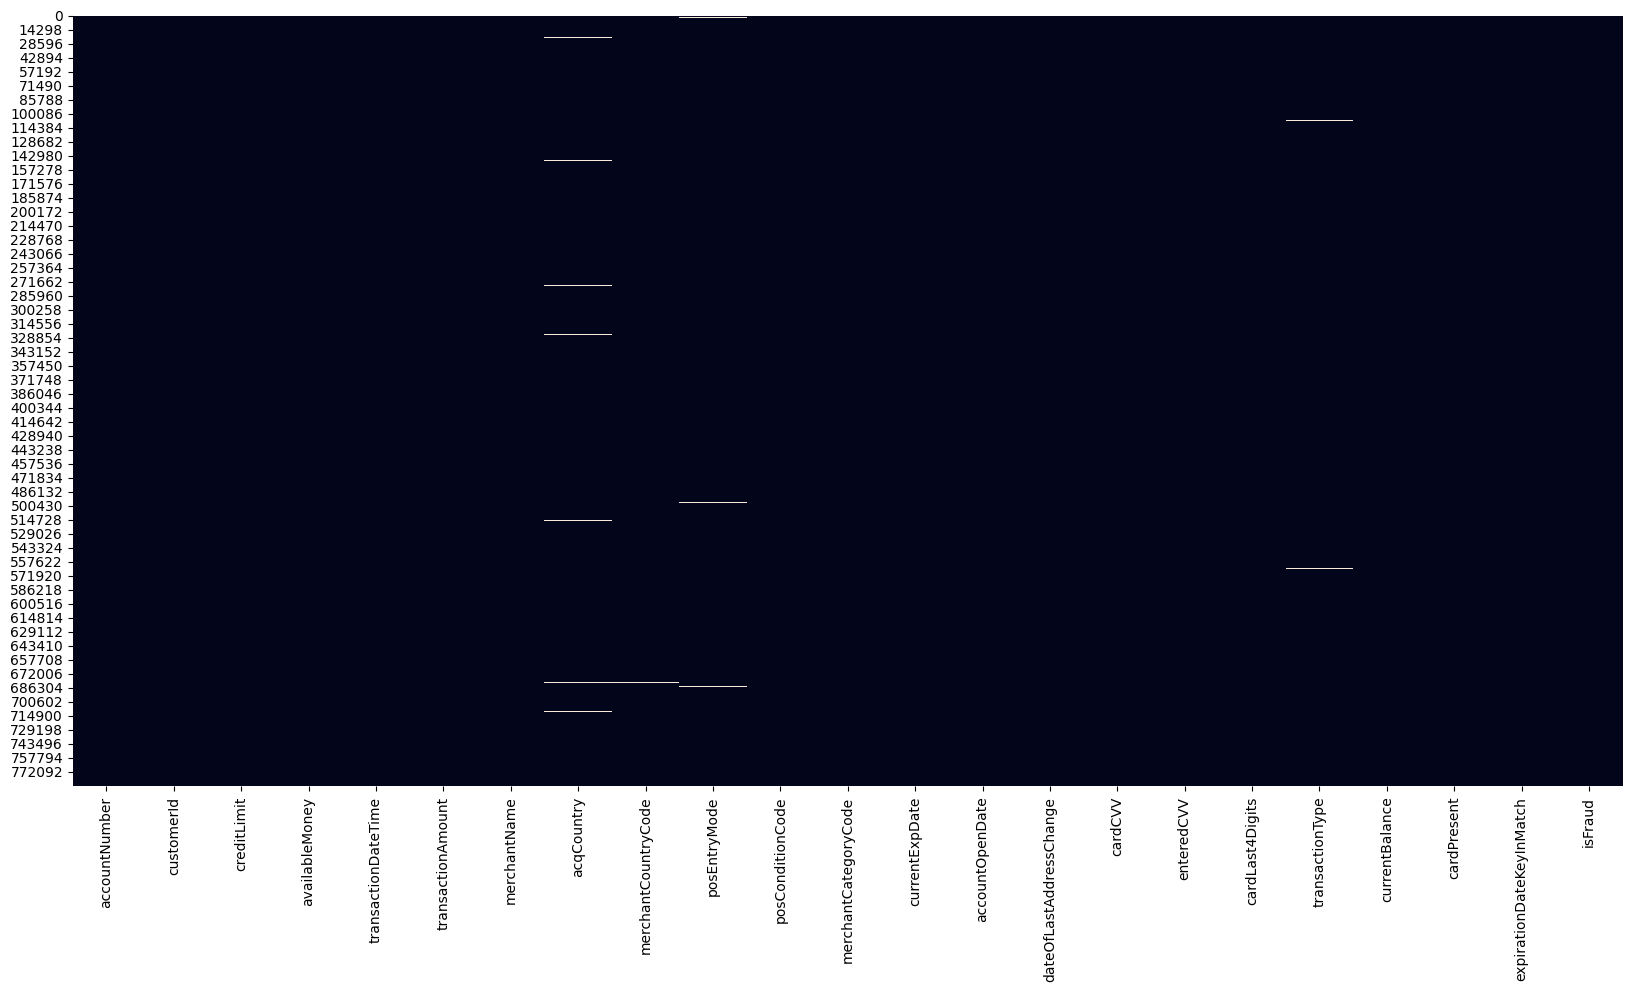

In [132]:
# Visualisation des données
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

on verifie la correlation entre les variable 

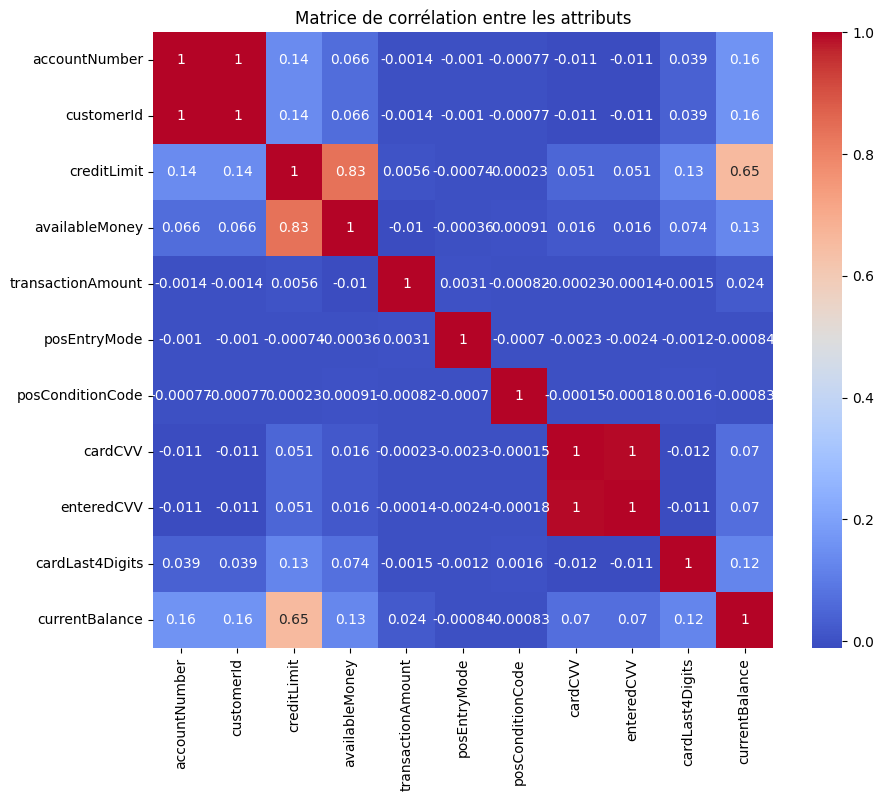

In [133]:
co = df.select_dtypes(include=['int','float'])
# Affichage de la matrice de corrélation entre les attributs
plt.figure(figsize=(10, 8))
correlation_matrix = co.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre les attributs")
plt.show()


 Il existe une corrélation très forte entre les colonnes 'accountNumber' et 'customerId'. Les deux colonnes soient pratiquement identiques, représentent toutes deux des identifiants, ce qui peut suggérer une redondance d'information. 

In [134]:
# Vérification si chaque personne possède une carte en comparant 'accountNumber' et 'customerId'
if (df['accountNumber'] == df['customerId']).all():
    print('true')
else:
    print('false')

true


Après avoir examiné les données, nous avons constaté que ces colonnes ne sont pas nécessaires pour notre analyse. Elles représentent des identifiants, mais puisque nous ne prévoyons pas d'utiliser ces informations, on les supprimes 

In [135]:
df['customerId'].unique()

array([737265056, 830329091, 574788567, ..., 899818521, 638498773,
       732852505], dtype=int64)

In [136]:
#On Supprime les colonnes d'identification.
df.drop(columns=['accountNumber', 'customerId'], inplace=True)
# , 'cardLast4Digits'

In [137]:
df.shape

(786363, 21)

on supprime les dates de ma dataset, car on prévois pas de les utiliser dans mon étude.les variables "merchantCategoryCode" et "merchantName" contiennent de nombreuses catégories différentes, mais elles n'influence passur ma variable cible. Par conséquent, on les supprime afin de simplifier le modèle sans sacrifier la qualité de l'étude.

In [138]:
#selectionne les colonnes contiennent des dates 
date_cols = ['transactionDateTime', 'currentExpDate',
             'accountOpenDate', 'dateOfLastAddressChange']
# supprimer date_cols
df.drop(columns=date_cols, inplace=True)

#selectionne les colonnes contiennent beaucoups de strings (variables): 
string_cols = ['merchantCategoryCode', 'merchantName'] 
# supprimer les deux colonnes
df.drop(columns=string_cols, inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.0,98.55,US,US,2.0,1.0,414,414,1803,PURCHASE,0.0,False,False,False
1,5000,5000.0,74.51,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,True,False,False
2,5000,5000.0,7.47,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False
3,5000,5000.0,7.47,US,US,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False
4,5000,5000.0,71.18,US,US,2.0,1.0,885,885,3143,PURCHASE,0.0,True,False,False


In [139]:
# on veut calculer le nbr de valeur qu'on a dans chaque catégorie
for col in df.select_dtypes('object') :
    print('____________________________________________________________________')

    print(df[col].value_counts())

____________________________________________________________________
US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64
____________________________________________________________________
US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64
____________________________________________________________________
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64


Nous identifions quatre types de codes 'merchantCountry'. Parmi eux, le code '(US)' prédomine, indiquant que les transactions sont largement associées aux États-Unis. Nous avons envisagé de créer une nouvelle colonne booléenne. Cette colonne sera basée sur deux attributs, à savoir 'acqCountry' et 'merchantCountryCode', vu leur forte corrélation, nous avons noté que les fraudes sont fréquemment associées à des transactions effectuées en dehors du pays d'origine de la carte

In [140]:
# Créer une nouvelle colonne pour vérifier la correspondance entre le pays de la transaction et le pays d'émission de la carte
df['card_in_country'] = df.merchantCountryCode == df.acqCountry

# Supprimer les anciennes colones
df.drop(columns=['merchantCountryCode', 'acqCountry'], inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,card_in_country
0,5000,5000.0,98.55,2.0,1.0,414,414,1803,PURCHASE,0.0,False,False,False,True
1,5000,5000.0,74.51,9.0,1.0,486,486,767,PURCHASE,0.0,True,False,False,True
2,5000,5000.0,7.47,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False,True
3,5000,5000.0,7.47,9.0,1.0,486,486,767,PURCHASE,0.0,False,False,False,True
4,5000,5000.0,71.18,2.0,1.0,885,885,3143,PURCHASE,0.0,True,False,False,True


In [141]:
#les colonnes contiennent des valeurs null
print(df.isnull().any())
print('_____________________________________')

#les colonnes contiennent des NaN
print(df.isnull().sum())
print('_____________________________________')

#les colonnes contiennent les valeurs vides 
print(df.eq('').sum())

creditLimit                 False
availableMoney              False
transactionAmount           False
posEntryMode                 True
posConditionCode             True
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType              True
currentBalance              False
cardPresent                 False
expirationDateKeyInMatch    False
isFraud                     False
card_in_country             False
dtype: bool
_____________________________________
creditLimit                    0
availableMoney                 0
transactionAmount              0
posEntryMode                4054
posConditionCode             409
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
card_in_country                0
dtype: int64

Nous constatons qu'aucun mot vide ('') n'est présent dans nos données.

Nous identifions cinq colonnes qui contiennent des valeurs manquantes.

In [142]:
#type boolean 
for col in df.select_dtypes('bool') :
    print(col)

cardPresent
expirationDateKeyInMatch
isFraud
card_in_country


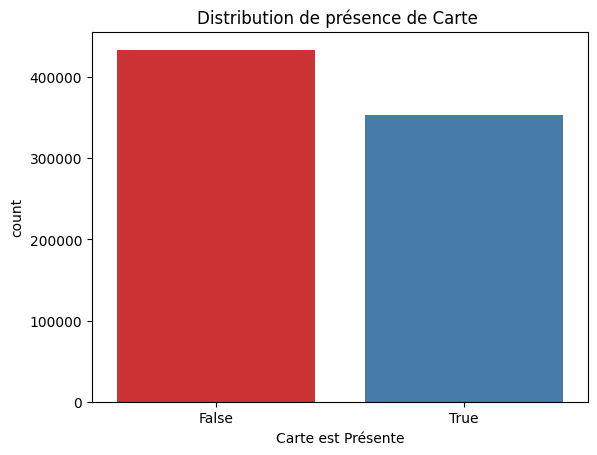

In [143]:
# cardPresent
# histogramme pour la distribution de cardPresent
sns.countplot(data=df, x='cardPresent', palette='Set1')
plt.xlabel('Carte est Présente')
#plt.ylabel('Count')
plt.title('Distribution de présence de Carte ')
plt.show()

'cardPresent'a une distribution équilibrée entre les deux valeurs (True et False) pour cette variable.

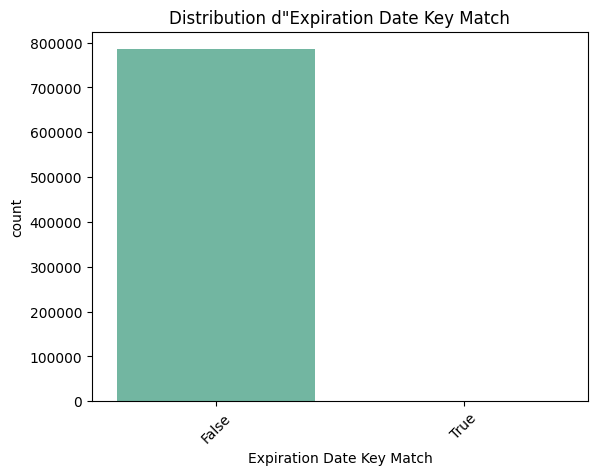

In [144]:
#  ExpirationDateKeyInMatch
#  Créer un histogramme pour la distribution de expirationDateKeyInMatch
sns.countplot(data=df, x='expirationDateKeyInMatch', palette='Set2')
plt.xlabel('Expiration Date Key Match')
plt.title('Distribution d"Expiration Date Key Match')
plt.xticks(rotation=45)
plt.show()

In [145]:
a=df.groupby(['cardPresent','isFraud']).size()
a

cardPresent  isFraud
False        False      424533
             True         8962
True         False      349413
             True         3455
dtype: int64

In [146]:
fraud_proportions = df[df['isFraud'] == True].groupby('cardPresent').size() / len(df[df['isFraud'] == True])
print('isFraud = true \n',fraud_proportions)

isFraud = true 
 cardPresent
False    0.721752
True     0.278248
dtype: float64


les cas de fraude sont plus fréquents lorsque la carte de paiement n'est pas présente.

In [147]:
df['expirationDateKeyInMatch'].value_counts()

False    785320
True       1043
Name: expirationDateKeyInMatch, dtype: int64

In [148]:
a=df.groupby(['expirationDateKeyInMatch','isFraud']).size()
a

expirationDateKeyInMatch  isFraud
False                     False      772916
                          True        12404
True                      False        1030
                          True           13
dtype: int64

la plupart des valeurs de la caractéristique "expirationDateKeyInMatch" sont égales à 0.
on peut déduire que cette variable ne peut pas affecter une transaction si elle est frauduleuse.

In [149]:
#on supprime la colonne
df.drop(['expirationDateKeyInMatch'], axis=1, inplace=True)


In [150]:
# verifions les NaN pour les colonnes de type object 
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print(df[i].unique())
    print('______________________________________________________')

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
______________________________________________________


In [151]:
#On supprime les lignes qui contiennent des nan dans les colonnes .

df.dropna(inplace=True)


In [152]:
# verifions si  valeurs manquantes sont bien étaient supprimé pour les colonnes de type object 
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print(df[i].unique())
    print('______________________________________________________')

PURCHASE                740944
REVERSAL                 20187
ADDRESS_VERIFICATION     20076
Name: transactionType, dtype: int64
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']
______________________________________________________


In [153]:
#les colonnes contiennent des NaN
print(df.isnull().sum())
print(df.dtypes)


creditLimit          0
availableMoney       0
transactionAmount    0
posEntryMode         0
posConditionCode     0
cardCVV              0
enteredCVV           0
cardLast4Digits      0
transactionType      0
currentBalance       0
cardPresent          0
isFraud              0
card_in_country      0
dtype: int64
creditLimit            int64
availableMoney       float64
transactionAmount    float64
posEntryMode         float64
posConditionCode     float64
cardCVV                int64
enteredCVV             int64
cardLast4Digits        int64
transactionType       object
currentBalance       float64
cardPresent             bool
isFraud                 bool
card_in_country         bool
dtype: object


Une corrélation forte entre "enteredCVV" et "cardCVV", créons la colonne checked_CVV ( verifier si 'enteredCVV' est meme que 'cardCVV')


In [154]:
df['checked_CVV'] = df.cardCVV == df.enteredCVV

In [155]:
# supprimons les anciennes colonnes de CVV
df.drop(columns=['cardCVV', 'enteredCVV'], inplace=True)
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
0,5000,5000.0,98.55,2.0,1.0,1803,PURCHASE,0.0,False,False,True,True
1,5000,5000.0,74.51,9.0,1.0,767,PURCHASE,0.0,True,False,True,True
2,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
3,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
4,5000,5000.0,71.18,2.0,1.0,3143,PURCHASE,0.0,True,False,True,True


In [156]:
# Créer une colonne qui indique si le solde actuel est dépassé par le montant de la transaction
df['vider_compte'] = df['transactionAmount'] >= df['currentBalance']
print(df['vider_compte'] .sum())
# Filtrer les transactions frauduleuses où le compte est vidé
transactions_frauduleuses_videes = df[(df['vider_compte']) & (df['isFraud'] == 1)]

# Afficher les transactions frauduleuses où le compte est vidé
print("Transactions frauduleuses où le compte est vidé:")
print(transactions_frauduleuses_videes.shape[0])


73116
Transactions frauduleuses où le compte est vidé:
1306


In [157]:
df = df.drop('vider_compte', axis=1)

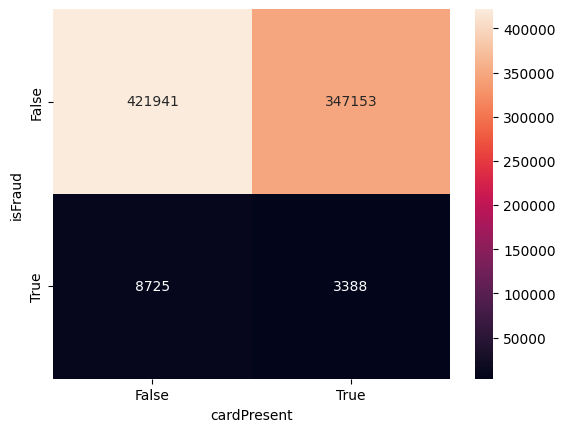

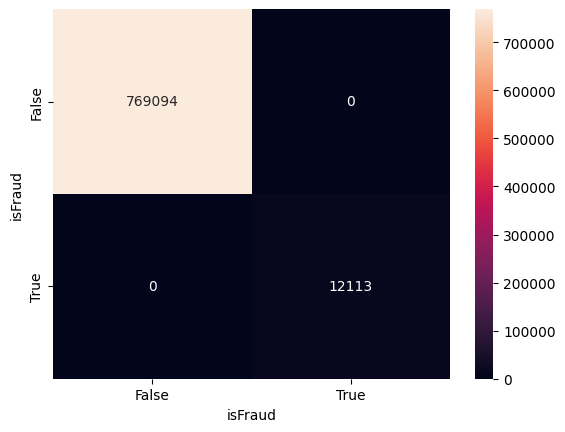

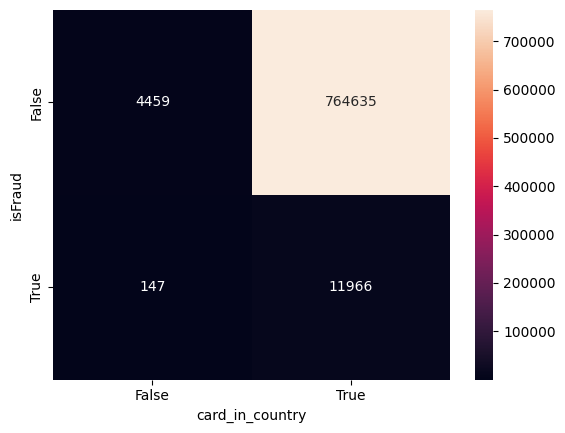

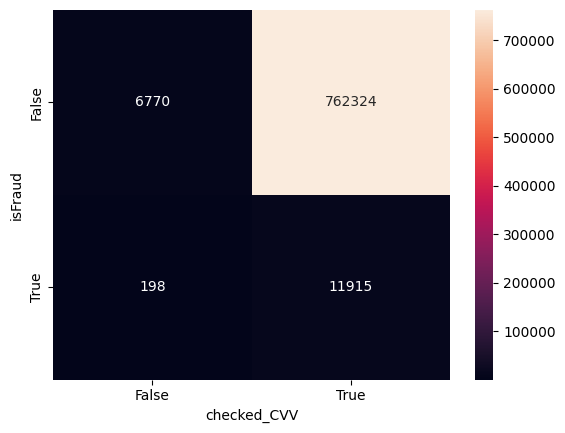

In [158]:
for col in df.select_dtypes('bool'): 
    plt.figure()
    sns.heatmap(pd.crosstab(df['isFraud'],df[col]),annot=True,fmt='d' )

In [159]:
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
0,5000,5000.0,98.55,2.0,1.0,1803,PURCHASE,0.0,False,False,True,True
1,5000,5000.0,74.51,9.0,1.0,767,PURCHASE,0.0,True,False,True,True
2,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
3,5000,5000.0,7.47,9.0,1.0,767,PURCHASE,0.0,False,False,True,True
4,5000,5000.0,71.18,2.0,1.0,3143,PURCHASE,0.0,True,False,True,True


In [160]:
df.shape

(781207, 12)

In [193]:
# on vérifie le shape des lignes uniques avant la suppression 
df.drop_duplicates().shape


(628288, 12)

In [191]:
#supprimons les duplications en conservant les lignes uniques
df.drop_duplicates(inplace=True)

In [192]:
df.shape

(628288, 12)

<Axes: xlabel='isFraud', ylabel='count'>

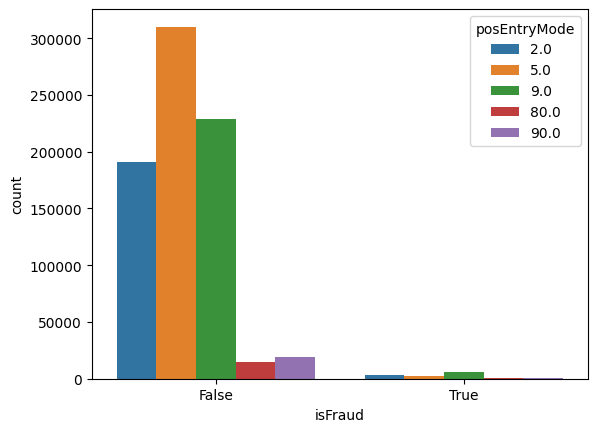

In [164]:
#int : 
sns.countplot(x='isFraud',hue='posEntryMode',data=df)

In [165]:
df.groupby(['posEntryMode','isFraud']).size().sort_values(ascending=False)


posEntryMode  isFraud
5.0           False      310053
9.0           False      228947
2.0           False      191066
90.0          False       19083
80.0          False       14934
9.0           True         5643
2.0           True         3412
5.0           True         2445
90.0          True          371
80.0          True          239
dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

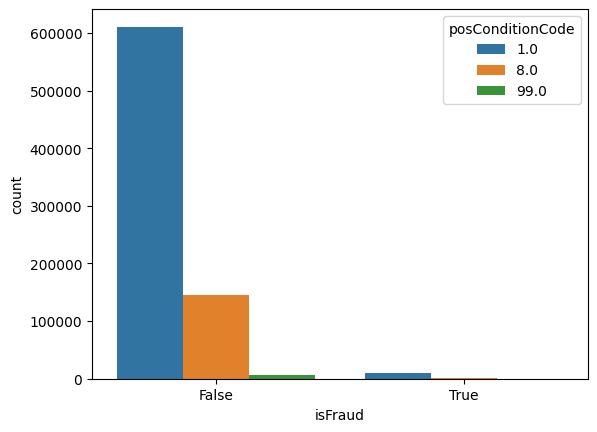

In [166]:
#float : 
sns.countplot(x='isFraud',hue='posConditionCode',data=df)

In [167]:
df.dtypes.value_counts()

float64    5
bool       4
int64      2
object     1
dtype: int64

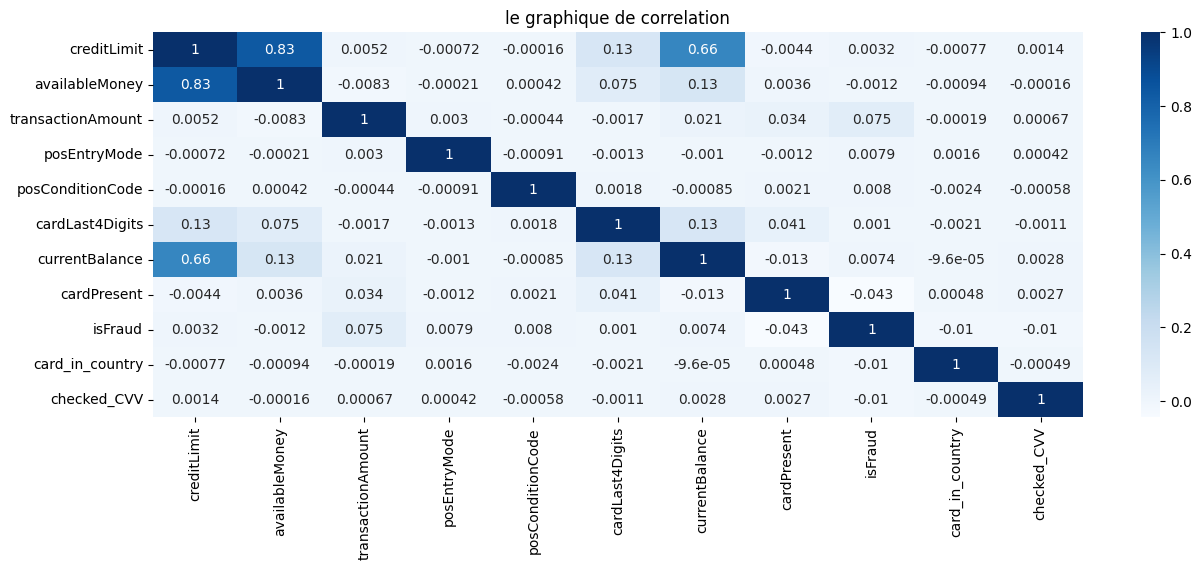

In [168]:
plt.figure(figsize=(15,5))
sns.heatmap(df.select_dtypes(include=['int','float','bool']).corr(), cmap='Blues', annot=True)
plt.title('le graphique de correlation')
plt.show()


# preprocessing : 

In [169]:
df.select_dtypes('bool')

,cardPresent,isFraud,card_in_country,checked_CVV
0,False,False,True,True
1,True,False,True,True
2,False,False,True,True
4,True,False,True,True
5,True,False,True,True
...,...,...,...,...
786358,False,False,True,True
786359,False,False,True,True
786360,False,False,True,True
786361,False,False,True,True


### outliers

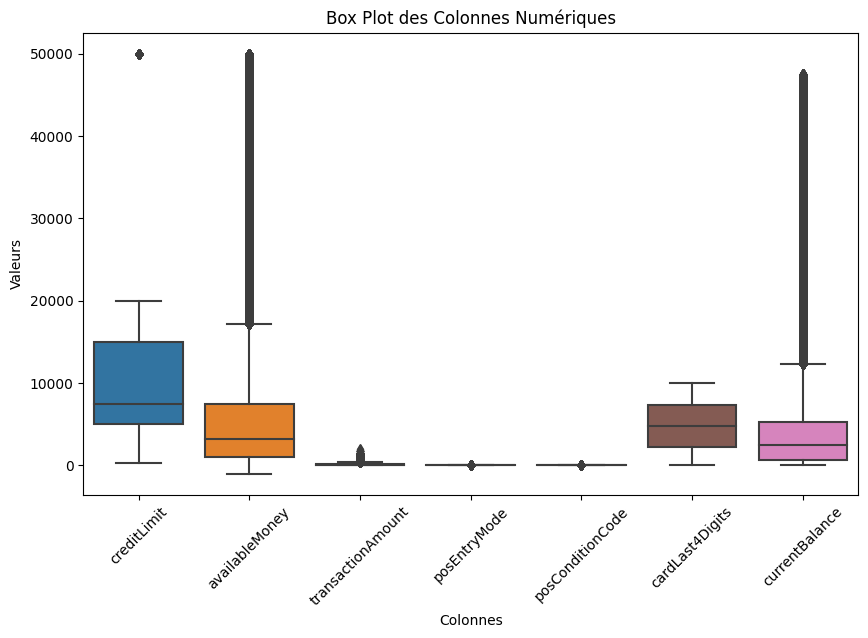

In [170]:
# Sélectionner les colonnes de types int et float
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Tracer un box plot pour chaque colonne numérique
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=45)
plt.title("Box Plot des Colonnes Numériques")
plt.xlabel("Colonnes")
plt.ylabel("Valeurs")
plt.show()

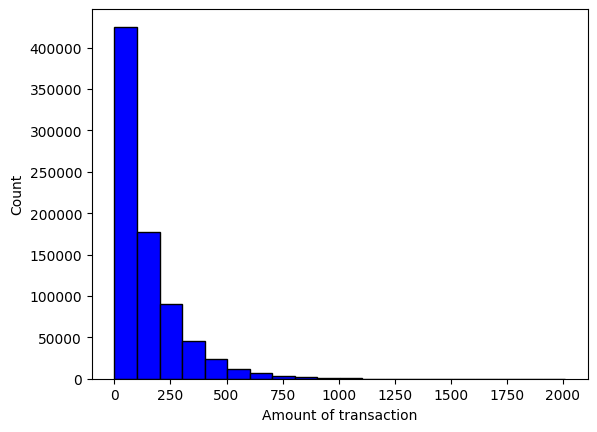

In [171]:
# outliers dans transactionAmount
plt.hist(data['transactionAmount'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

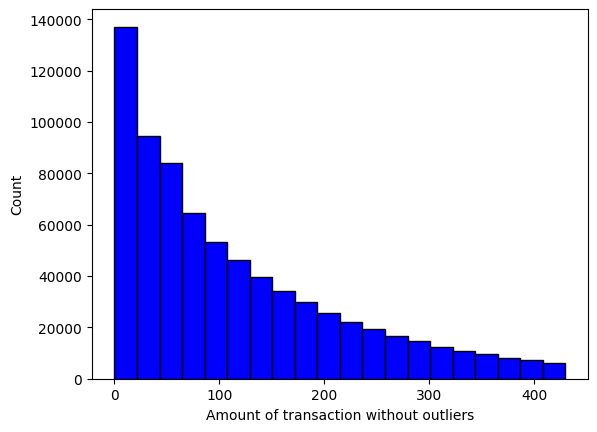

In [172]:
#transaction values should be no less than 0 on supprime les transactions moins de 0 . ( < 0 ) 
#On supprime aussi les outlier qui sont plus de  Q3 + 1.5IQR
q1, q3 = np.percentile(sorted(df.transactionAmount),[25,75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df['transactionAmount'] = df['transactionAmount'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

plt.hist(df['transactionAmount'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

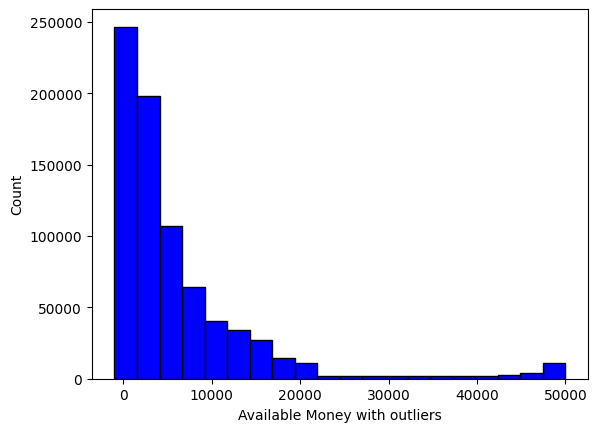

In [173]:
# outliers  dans availableMoney

plt.hist(df['availableMoney'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money with outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

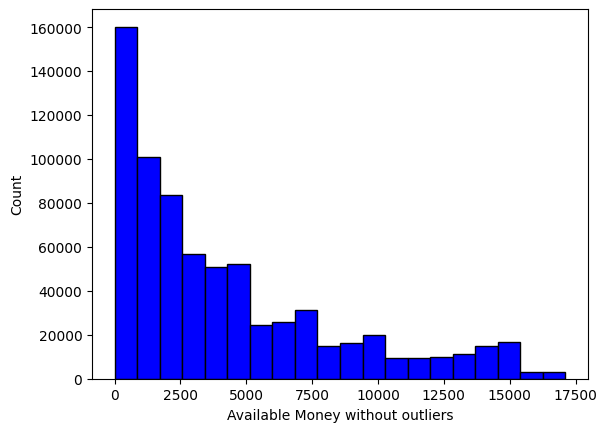

In [174]:
q1, q3 = np.percentile(sorted(df.availableMoney), [25, 75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df.availableMoney = df.availableMoney[df.availableMoney.between(lower_bound, upper_bound)]

plt.hist(df.availableMoney, color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


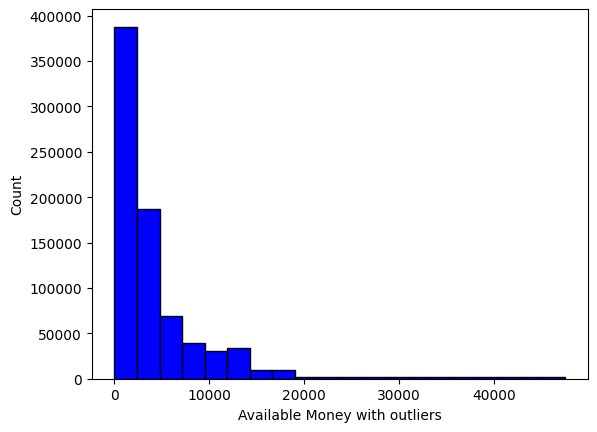

In [175]:
# outliers dans currentBalance

plt.hist(data['currentBalance'], color='blue', edgecolor='black', bins=20)
plt.xlabel('Available Money with outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

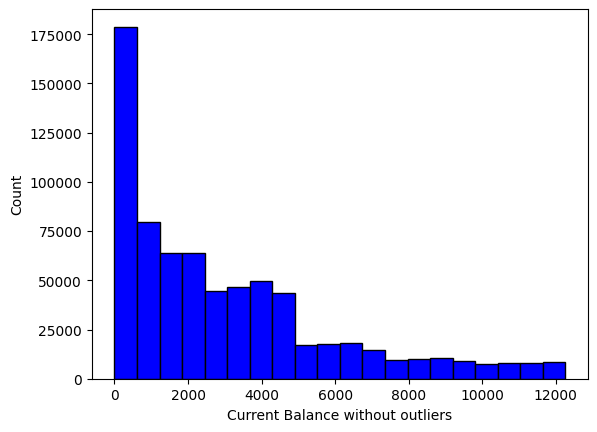

In [176]:
# on supprime les outliers

q1, q3 = np.percentile(sorted(df.currentBalance), [25, 75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr)
df.currentBalance= df.currentBalance[df.currentBalance.between(lower_bound, upper_bound)]

plt.hist(df.currentBalance, color='blue', edgecolor='black', bins=20)
plt.xlabel('Current Balance without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()


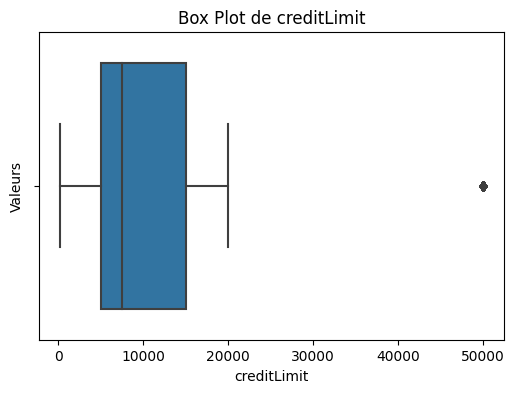

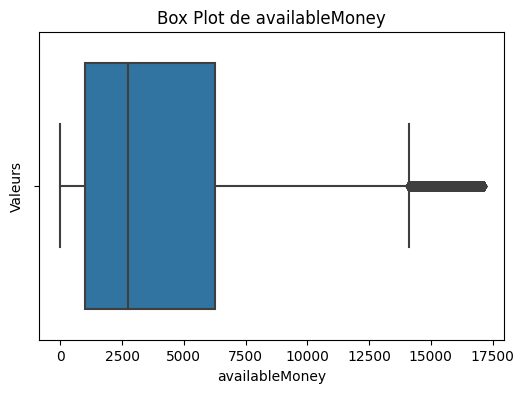

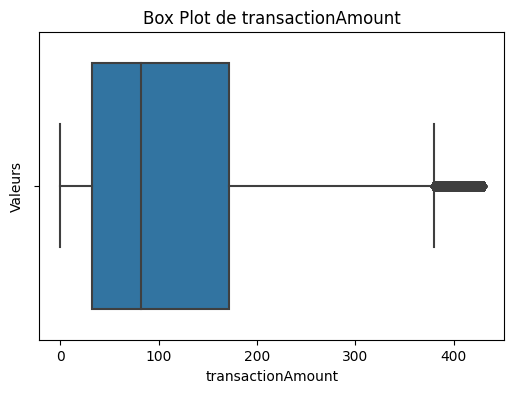

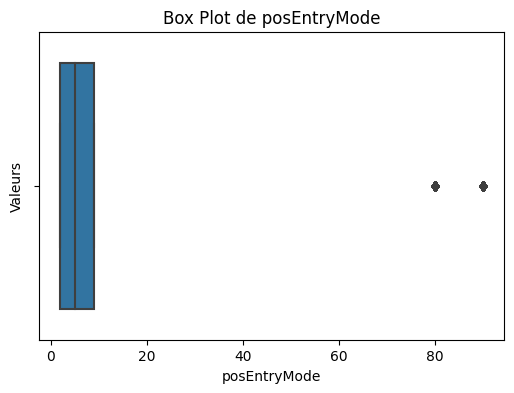

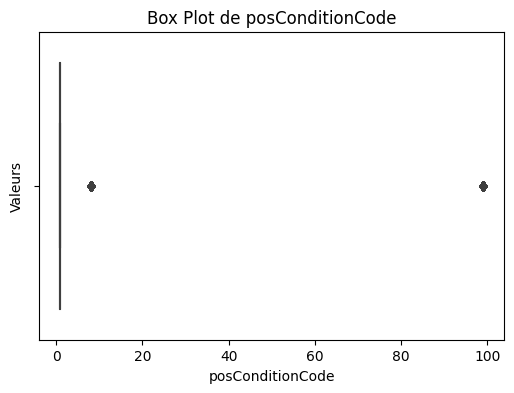

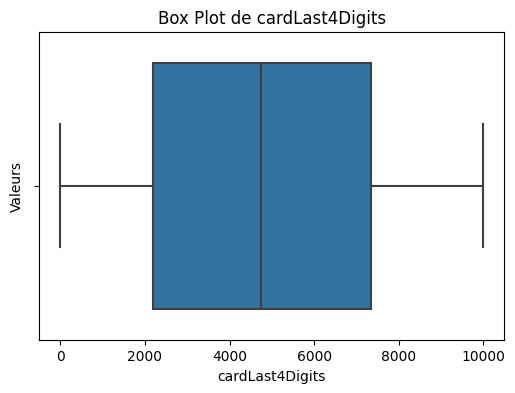

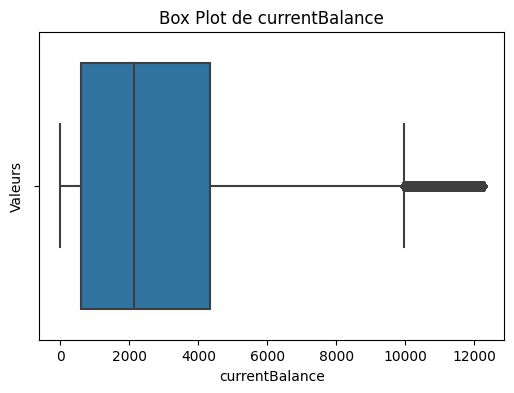

In [177]:
# Sélectionner les colonnes de types int et float
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Itérer à travers chaque colonne numérique et tracer un box plot individuel
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_columns[column])
    plt.title(f"Box Plot de {column}")
    plt.xlabel(column)
    plt.ylabel("Valeurs")
    plt.show()


In [178]:
df.select_dtypes('object')

,transactionType
0,PURCHASE
1,PURCHASE
2,PURCHASE
4,PURCHASE
5,PURCHASE
...,...
786358,PURCHASE
786359,PURCHASE
786360,PURCHASE
786361,PURCHASE


In [179]:

#bools
# Convertir les colonnes booléennes en entiers dans le dataframe df
bool_columns = ['cardPresent', 'isFraud', 'checked_CVV', 'card_in_country']

df['cardPresent'] = df['cardPresent'].astype('Int64')
df['isFraud'] = df['isFraud'].astype('int64')
df['checked_CVV'] = df['checked_CVV'].astype('int64')
df['card_in_country'] = df['card_in_country'].astype('int64')


In [180]:

# object   
#encodage de la colonne 'type' : 
df['transactionType'] = df['transactionType'].replace(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL'],[1, 2, 3])


In [181]:
df.transactionType.value_counts()

1    736262
3     20187
2     19744
Name: transactionType, dtype: int64

In [182]:
df['transactionType'].dtypes

dtype('int64')

In [183]:
df.dropna(inplace=True)


In [184]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')  # Remplacer par 'mean' si vous préférez la moyenne
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [185]:
df['isFraud'] = df['isFraud'].astype(int)


In [186]:
df.dtypes.value_counts()

int64      5
float64    5
Int64      1
int32      1
dtype: int64

In [187]:
# engistrer df
df.to_csv('trans_cleaned_df.csv', index=False)

In [188]:
df.head(n=10)

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
0,5000,5000.0,98.55,2.0,1.0,1803,1,0.0,0,0,1,1
1,5000,5000.0,74.51,9.0,1.0,767,1,0.0,1,0,1,1
2,5000,5000.0,7.47,9.0,1.0,767,1,0.0,0,0,1,1
4,5000,5000.0,71.18,2.0,1.0,3143,1,0.0,1,0,1,1
5,5000,5000.0,30.76,2.0,1.0,3143,1,0.0,1,0,1,1
6,5000,5000.0,57.28,2.0,1.0,3143,1,0.0,1,0,1,1
7,5000,5000.0,9.37,5.0,1.0,3143,1,0.0,1,0,1,1
9,5000,5000.0,164.37,5.0,8.0,3143,1,0.0,1,0,1,1
10,5000,5000.0,160.18,2.0,8.0,3143,1,0.0,1,0,1,1
11,5000,5000.0,40.75,9.0,1.0,3143,1,0.0,0,0,1,1


In [189]:
df.shape

(628288, 12)

In [190]:
df.tail()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardLast4Digits,transactionType,currentBalance,cardPresent,isFraud,card_in_country,checked_CVV
786248,10000,916.10,11.56,9.0,1.0,4635,1,9083.90,1,0,1,1
786249,10000,904.54,263.51,90.0,1.0,4635,1,9095.46,1,0,1,1
786250,10000,641.03,184.59,5.0,8.0,4635,1,9358.97,1,0,1,1
786251,10000,6278.77,25.19,5.0,1.0,321,1,3721.23,1,0,1,1
786252,10000,6253.58,28.29,9.0,1.0,4635,1,3746.42,1,0,1,1


<Axes: >

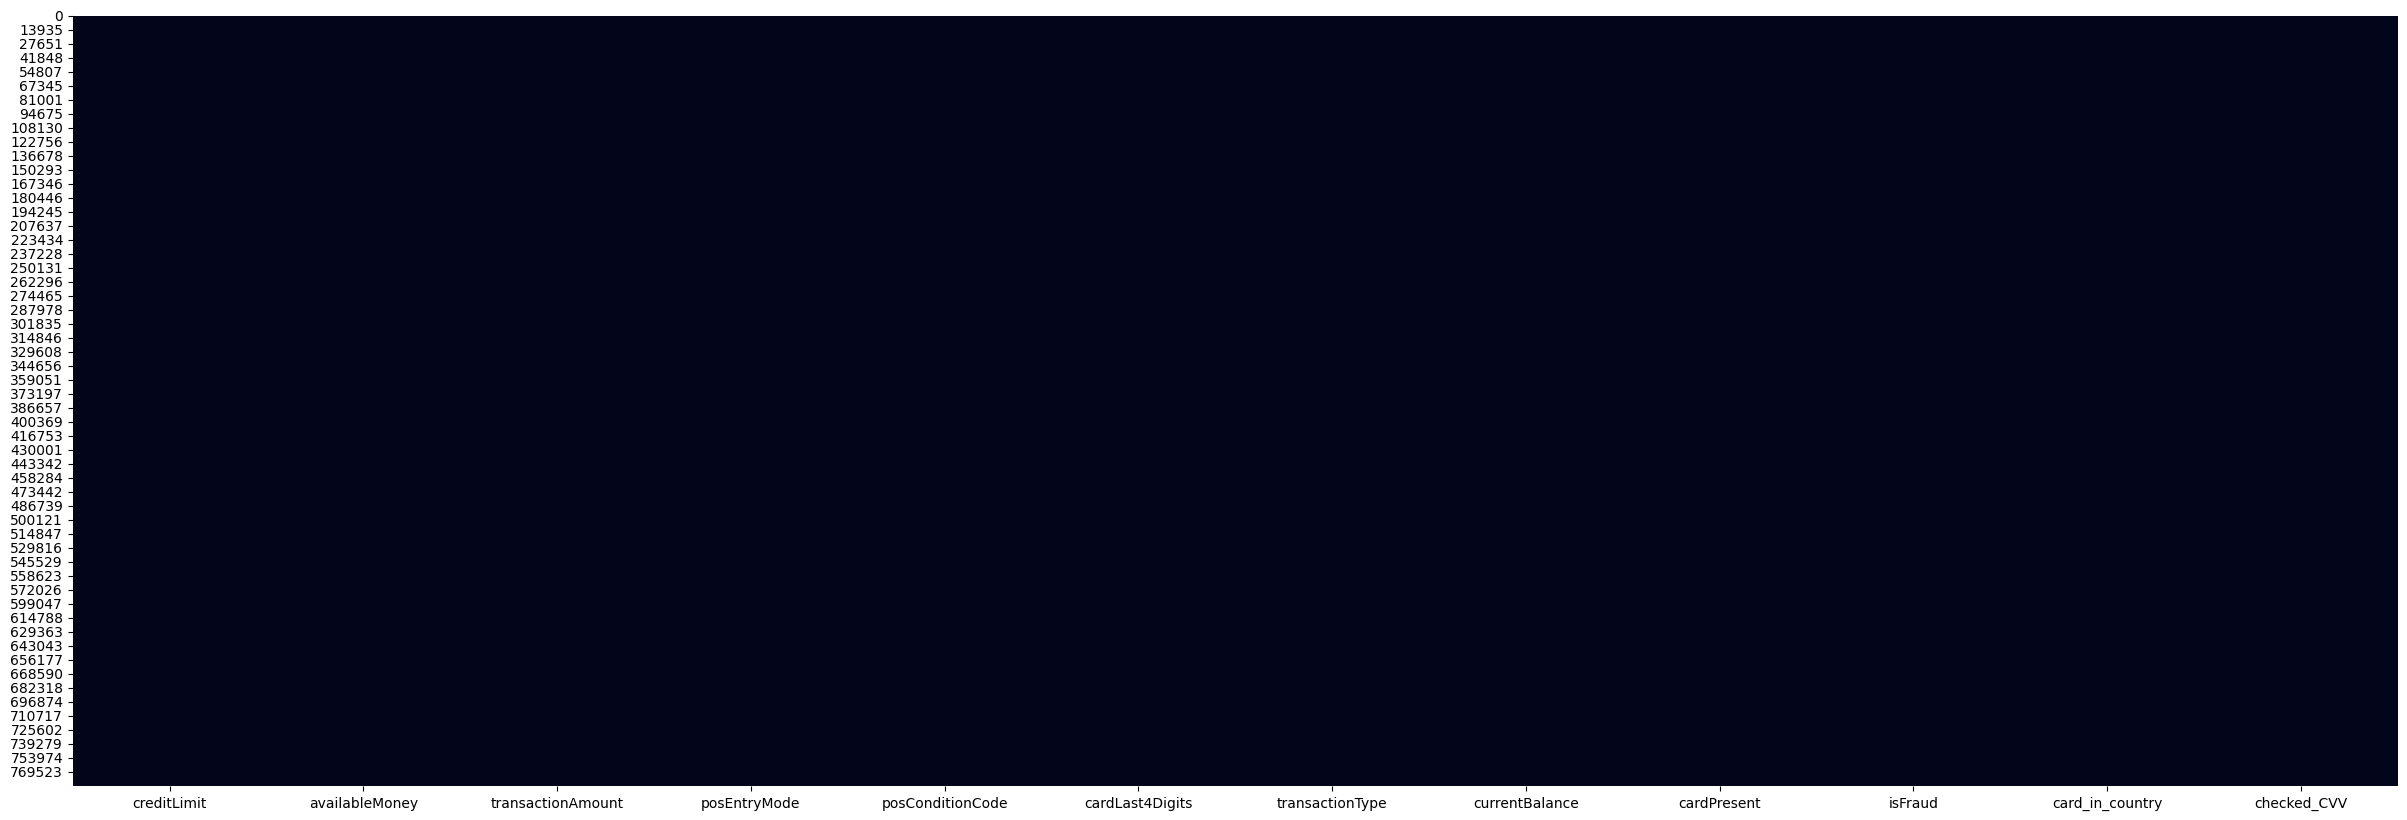

In [194]:
# Vérification des valeurs manquantes 
df.isna()
plt.figure(figsize=(30,10))
# Affichage d'une carte thermique pour visualiser les valeurs manquantes
sns.heatmap(df.isna(), cbar=False)